<a href="https://colab.research.google.com/github/helomelo1/ZtH_with_Karpathy/blob/main/makemore_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
print(words[:5])

['emma', 'olivia', 'ava', 'isabella', 'sophia']


In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

# print(itos)

In [4]:
block_size = 3
X, y = [], []

for w in words:
    # print('\n', w)
    context = [0] * block_size

    for ch in w + '.':
        idx = stoi[ch]
        X.append(context)
        y.append(idx)

        # print(''.join(itos[i] for i in context), '->', itos[idx])

        context = context[1:] + [idx]

X = torch.tensor(X)
y = torch.tensor(y)

In [5]:
print(X.shape)
print(y.shape)

torch.Size([228146, 3])
torch.Size([228146])


In [6]:
def build_dataset(words):
    block_size = 3
    X, y = [], []

    for w in words:
        context = [0] * block_size

        for ch in w + '.':
            idx = stoi[ch]
            X.append(context)
            y.append(idx)

            context = context[1:] + [idx]

    X = torch.tensor(X)
    y = torch.tensor(y)

    return X, y

import random

random.seed(124)
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, y_train = build_dataset(words[:n1])
X_val, y_val = build_dataset(words[n1:n2])
X_test, y_test = build_dataset(words[n2:])

In [7]:
c = torch.randn((27, 2))
embedding = c[X]
print(embedding.shape)

torch.Size([228146, 3, 2])


In [8]:
w1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [9]:
h = torch.matmul(embedding.view(-1, 6), w1) + b1
h = torch.tanh(h)

In [10]:
w2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [11]:
logits = torch.matmul(h, w2) + b2
logits.shape

torch.Size([228146, 27])

In [12]:
counts = logits.exp()

In [13]:
probs = counts / counts.sum(1, keepdim=True)
probs.shape

torch.Size([228146, 27])

In [21]:
# REARRANGING STUFF BELOW

In [101]:
g = torch.Generator().manual_seed(0)
c = torch.randn((27, 10), generator=g)

w1 = torch.randn((30, 200))
b1 = torch.randn(200)

w2 = torch.randn((200, 27))
b2 = torch.randn(27)

parameters = [c, w1, b1, w2, b2]

In [102]:
sum(p.nelement() for p in parameters)

11897

In [103]:
for p in parameters:
    p.requires_grad = True

In [104]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [105]:
lri = []
lossi = []
stepi = []

In [106]:
for i in range(200000):
    idx = torch.randint(0, X_train.shape[0], (32, ))

    emb = c[X_train[idx]]

    h = torch.matmul(emb.view(-1, 30), w1) + b1
    h = torch.tanh(h)

    logits = torch.matmul(h, w2) + b2
    loss = F.cross_entropy(logits, y_train[idx])

    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # lri.append(lrs[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

    # if i % 100 == 0:
    #     print(f'Epoch {i}: {loss.item()}')

print(loss.item())

2.1639962196350098


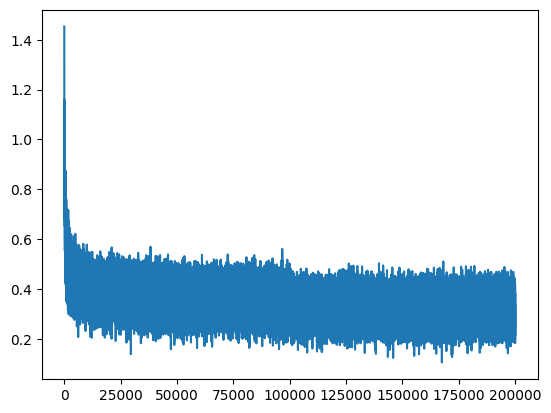

In [107]:
plt.plot(stepi, lossi)

In [108]:
emb = c[X_train]
h = torch.matmul(emb.view(-1, 30), w1) + b1
h = torch.tanh(h)
logits = torch.matmul(h, w2) + b2
loss = F.cross_entropy(logits, y_train)
loss.item()

2.130253314971924

In [109]:
emb = c[X_val]
h = torch.matmul(emb.view(-1, 30), w1) + b1
h = torch.tanh(h)
logits = torch.matmul(h, w2) + b2
loss = F.cross_entropy(logits, y_val)
loss.item()

2.171353816986084

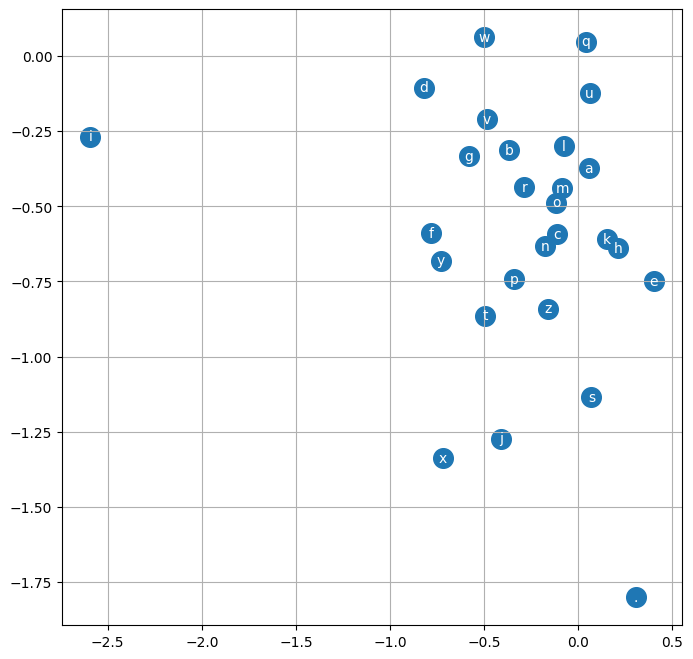

In [110]:
plt.figure(figsize=(8, 8))
plt.scatter(c[:, 0].data, c[:, 1].data, s=200)

for i in range(c.shape[0]):
    plt.text(c[i, 0].item(), c[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [ ]:
# SAMPLING FROM THE MODEL

In [112]:
g = torch.Generator().manual_seed(216518596)

for _ in range(20):
    out = []
    context = [0] * block_size

    while True:
        emb = c[torch.tensor([context])]
        h = torch.matmul(emb.view(1, -1), w1) + b1
        h = torch.tanh(h)
        logits = torch.matmul(h, w2) + b2
        probs = F.softmax(logits, dim=1)

        idx = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        context = context[1:] + [idx]
        out.append(idx)

        if idx == 0:
            break

    print(''.join(itos[i] for i in out))

elan.
atd.
alachina.
daj.
oza.
grilani.
adrie.
damelyn.
kenniaan.
ano.
ant.
alanilynn.
jaylemilyah.
ana.
jaissia.
esiliana.
bhea.
rowiannetta.
shodia.
alicialay.
